# Notebook that models Multiple Logistic Regression, Random Forest, and Gradient Boosting on ICU prediction mortality dataset
## Author : Samantha Fuentes

In [ ]:
import pandas as pd
import numpy as np

# %load_ext autoreload
# %autoreload 2

%reload_ext autoreload

from model_helper import *

In [ ]:
# patient_data = pd.read_csv('/content/data01.csv')
patient_data = pd.read_csv('data01.csv')

# drop identifying data
patient_data.drop(['group', 'ID'], axis=1, inplace=True)

# drop rows where the outcome column is null
patient_data = patient_data[patient_data['outcome'].notna()]

print('Data size before clean up : ',patient_data.shape)

# fill in missing column entries with median value for each column 
patient_data = patient_data.fillna(patient_data.median())


print('Data size after clean up : ',patient_data.shape)

Data size before clean up :  (1176, 49)
Data size after clean up :  (1176, 49)


In [ ]:
patient_data

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0.0,72,1,37.588179,0,0,0,1,1,0,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,0.0,75,2,28.312474,0,0,0,0,1,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,0.0,83,2,26.572634,0,0,0,0,1,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,0.0,43,2,83.264629,0,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,0.0,75,2,31.824842,1,0,0,0,1,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0.0,62,1,25.516870,1,1,0,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,7.380,27.714286,1.6,43.0,40
1173,0.0,78,1,25.822710,0,1,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,7.380,20.480000,1.6,43.0,30
1174,0.0,85,2,23.891779,1,1,0,1,1,0,...,136.000000,8.466667,97.285714,14.000000,2.028571,7.380,28.857143,1.6,43.0,55
1175,0.0,79,2,35.288554,0,0,1,1,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,7.380,24.375000,1.6,43.0,25


In [ ]:
X_train, X_test, y_train, y_test = split_train_test_data(patient_data, 0.3, True)

Training logistic regression accuracy is:  0.8918590522478737
Training mean absolute error is:  0.10814094775212636
Training mean squared error is:  0.10814094775212636

Test logistic regression accuracy is:  0.8526912181303116
Test mean absolute error is:  0.14730878186968838
Test mean squared error is:  0.14730878186968838


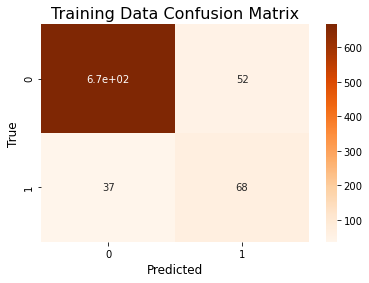

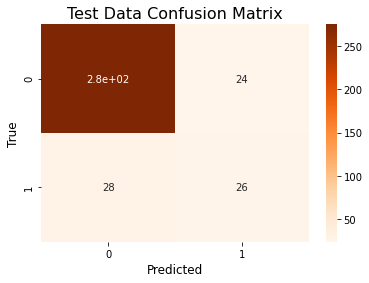

(0.8918590522478737, 0.8526912181303116)

In [ ]:
model_log_reg(X_train, X_test, y_train, y_test, True, True)

Best Number of Principal Components for PCA : 14
Best Train Accuracy :  0.8590522478736331
Best Test Accuracy :  0.8101983002832861


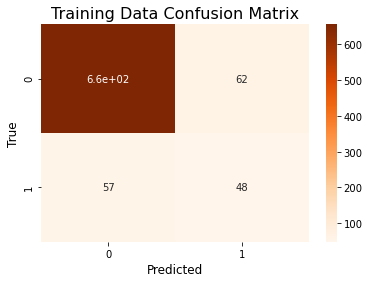

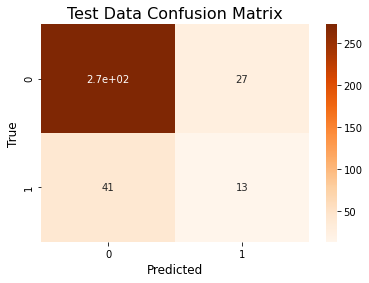

In [ ]:
optimize_pca(X_train, X_test, y_train, y_test)

C:\Users\saman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\saman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


Best Number of Estimators : 36
Best Train Accuracy :  0.9987849331713244
Best Test Accuracy :  0.8611898016997167


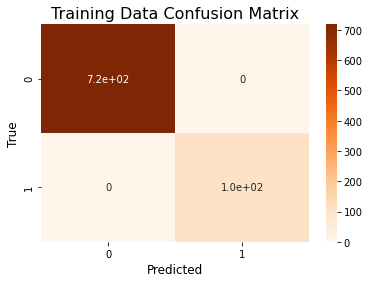

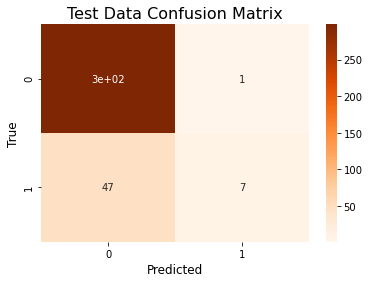

In [ ]:
optimize_random_forest(X_train, X_test, y_train, y_test)

Best Learning Rate : 0.12
Best Train Accuracy :  0.9866342648845686
Best Test Accuracy :  0.8668555240793201


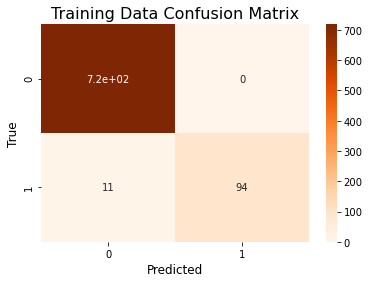

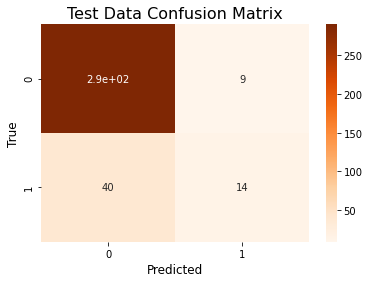

In [ ]:
optimize_gradient_booster(X_train, X_test, y_train, y_test)

In [ ]:
cluster_patient_data = model_cluster(patient_data, 4)

# first_cluster = cluster_patient_data[cluster_patient_data['cluster']==0]
# second_cluster = cluster_patient_data[cluster_patient_data['cluster']==1]
# third_cluster = cluster_patient_data[cluster_patient_data['cluster']==2]
# fourth_cluster = cluster_patient_data[cluster_patient_data['cluster']==3]

In [ ]:
cluster_patient_data

,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,...,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,cluster
0,72,1,37.588179,0,0,0,1,1,0,1,...,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,0
1,75,2,28.312474,0,0,0,0,1,0,0,...,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,0
2,83,2,26.572634,0,0,0,0,1,0,0,...,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,0
3,43,2,83.264629,0,0,0,0,0,0,0,...,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0
4,75,2,31.824842,1,0,0,0,1,0,0,...,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,62,1,25.516870,1,1,0,1,0,1,1,...,10.271429,94.428571,20.142857,2.714286,7.380,27.714286,1.6,43.0,40,2
1173,78,1,25.822710,0,1,0,1,0,1,1,...,10.523529,101.720000,18.160000,2.012500,7.380,20.480000,1.6,43.0,30,2
1174,85,2,23.891779,1,1,0,1,1,0,0,...,8.466667,97.285714,14.000000,2.028571,7.380,28.857143,1.6,43.0,55,2
1175,79,2,35.288554,0,0,1,1,1,1,1,...,8.183333,104.000000,15.750000,2.090000,7.380,24.375000,1.6,43.0,25,2


In [ ]:
first_cluster = cluster_patient_data.loc[lambda cluster_patient_data: cluster_patient_data['cluster'] == 0, :]
second_cluster = cluster_patient_data.loc[lambda cluster_patient_data: cluster_patient_data['cluster'] == 1, :]
third_cluster = cluster_patient_data.loc[lambda cluster_patient_data: cluster_patient_data['cluster'] == 2, :]
fourth_cluster = cluster_patient_data.loc[lambda cluster_patient_data: cluster_patient_data['cluster'] == 3, :]

clusters = [first_cluster, second_cluster, third_cluster, fourth_cluster]

Optimized Models for Cluster # 1


C:\Users\saman\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\saman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\saman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


Best Number of Estimators : 42
Best Train Accuracy :  1.0
Best Test Accuracy :  0.90625


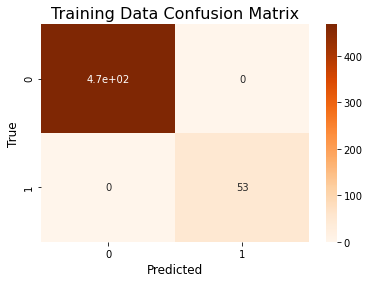

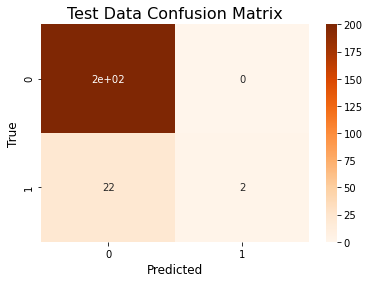

Best Learning Rate : 0.16999999999999998
Best Train Accuracy :  1.0
Best Test Accuracy :  0.9196428571428571


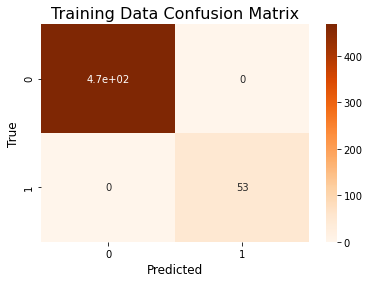

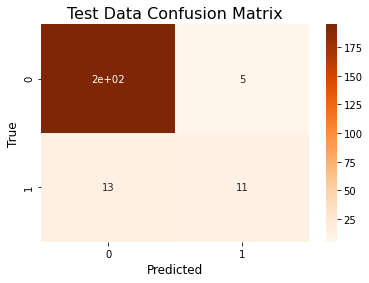


Optimized Models for Cluster # 2


C:\Users\saman\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Best Number of Estimators : 20
Best Train Accuracy :  0.9942857142857143
Best Test Accuracy :  0.8157894736842105


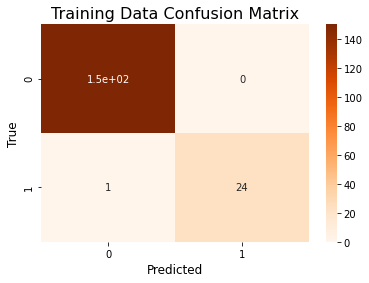

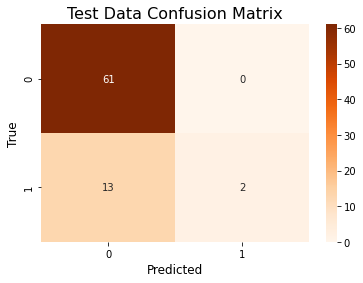

Best Learning Rate : 0.13
Best Train Accuracy :  1.0
Best Test Accuracy :  0.8289473684210527


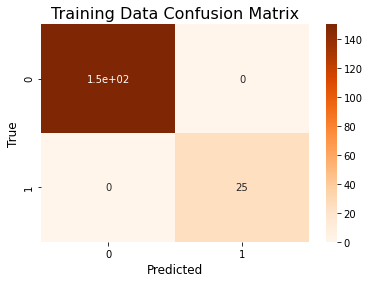

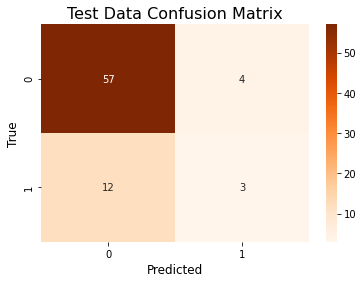


Optimized Models for Cluster # 3


C:\Users\saman\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Best Number of Estimators : 20
Best Train Accuracy :  1.0
Best Test Accuracy :  0.6923076923076923


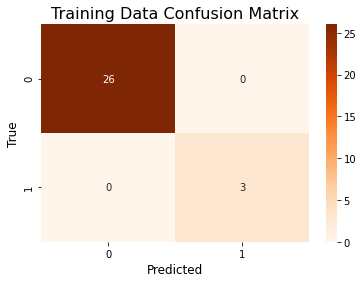

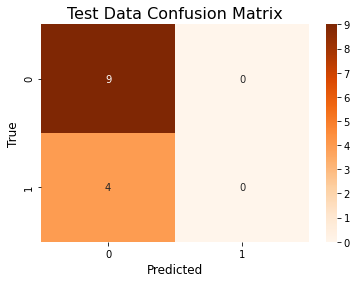

Best Learning Rate : 0.1
Best Train Accuracy :  1.0
Best Test Accuracy :  0.5384615384615384


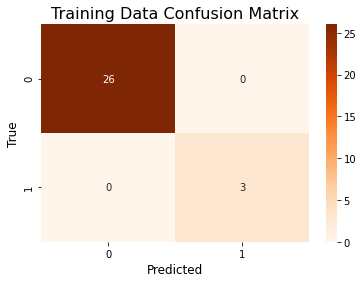

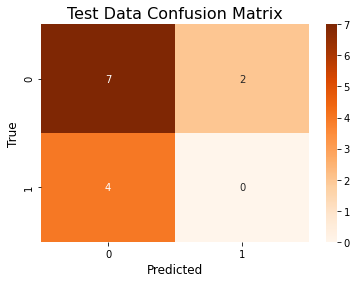


Optimized Models for Cluster # 4


C:\Users\saman\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Best Number of Estimators : 26
Best Train Accuracy :  1.0
Best Test Accuracy :  0.8571428571428571


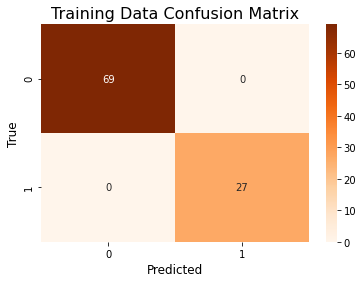

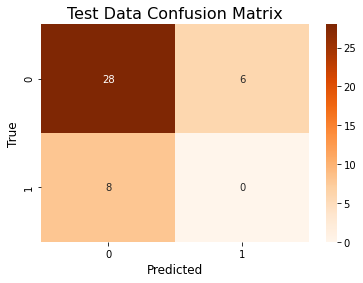

Best Learning Rate : 0.16999999999999998
Best Train Accuracy :  1.0
Best Test Accuracy :  0.7380952380952381


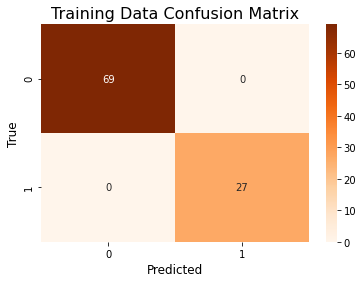

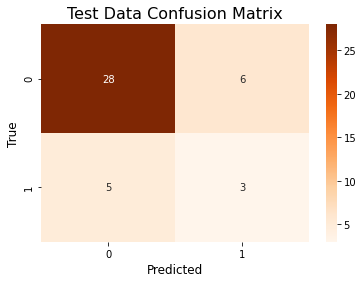

In [ ]:
for i in range(len(clusters)):
    print('Optimized Models for Cluster #',i+1)
    optimize_cluster(clusters[i])
    print()